In [984]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [985]:
pd.options.display.float_format = '{:.5f}'.format

In [986]:
data = pd.read_csv("data/House_Rent_Dataset.csv")

In [987]:
data.shape

(4746, 12)

In [988]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


<font size="5">Checking for null values</font>

In [989]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [990]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

<font size="5">Checking for duplicated values</font>

In [991]:
data.duplicated().sum()

0

## Features Engineering

### Creating new columns base on Floor

<font size="5">Creating a column that contain the current floor of building for renting</font>

In [992]:
lst_floor = []
lst_ = ['Ground', 'Basement']
for s in data.Floor:
    for ch in lst_:
        if ch in s:
            lst_floor.append('0')
            break
    else:
        lst_floor.append(s[:2])
data['current_floor'] = lst_floor
data['current_floor'] = data['current_floor'].astype(int)

<font size="5">Creating a column that contain the number of max floor of building</font>

In [993]:
lst_floor_max = []
for s in data.Floor:
    if(s[-2:] != 'nd'):
        lst_floor_max.append(s[-2:])
    else:
        lst_floor_max.append('0')
data['max_floor'] = lst_floor_max
data['max_floor'] = data['max_floor'].astype(int)

In [994]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,current_floor,max_floor
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


# EDA For House Rent

In [995]:
data.describe().style.background_gradient(cmap='Greens')

,BHK,Rent,Size,Bathroom,current_floor,max_floor
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,34993.451327,967.490729,1.965866,3.445638,6.968605
std,0.832256,78106.412937,634.202328,0.884532,5.767071,9.467245
min,1.000000,1200.000000,10.000000,1.000000,0.000000,0.000000
25%,2.000000,10000.000000,550.000000,1.000000,1.000000,2.000000
50%,2.000000,16000.000000,850.000000,2.000000,2.000000,4.000000
75%,3.000000,33000.000000,1200.000000,2.000000,3.000000,6.000000
max,6.000000,3500000.000000,8000.000000,10.000000,76.000000,89.000000


<font size="5">Rent has the strong left skewd (mean > median)</font>

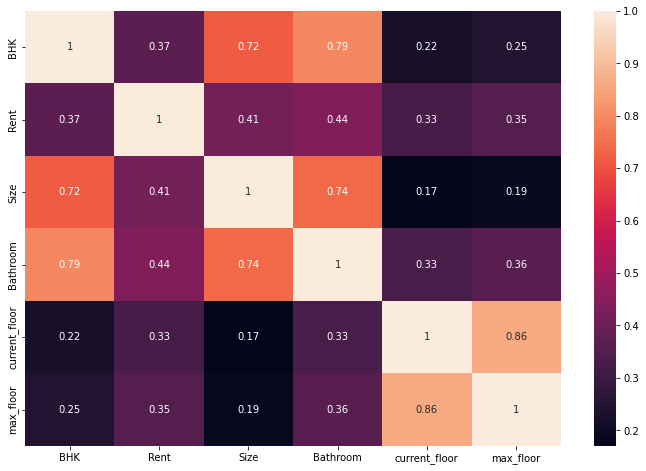

In [996]:
plt.figure(figsize=(12,8))
sns.heatmap(data=data.corr(), annot=True)
plt.show();

<font size="5">As the chart illustrates</font>

* <font size="5">Bathroom and Size have strong positive correlation with BHK</font>

* <font size="5">Bathroom has strong positive correlation Size</font>

* <font size="5">Current_floor has strong positive correlation with max_floor</font>

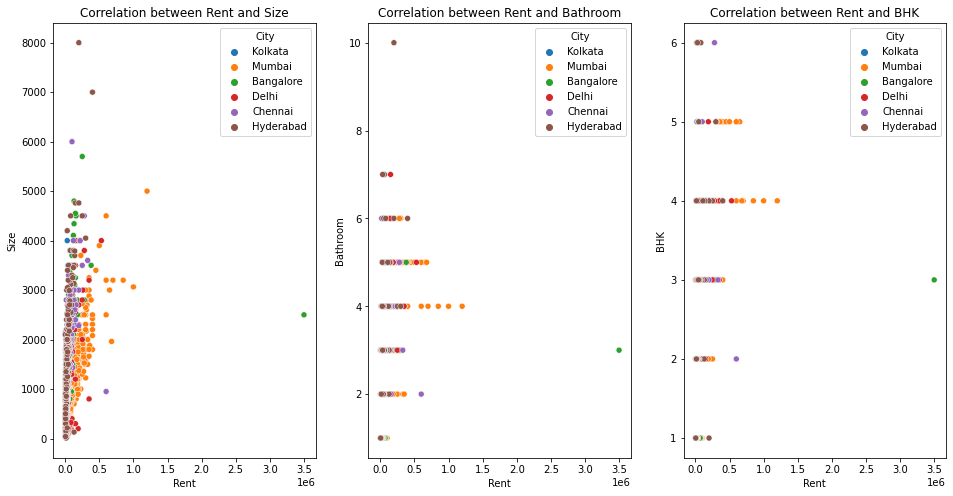

In [997]:
fig, axs = plt.subplots(1, 3, figsize=(16,8))

sns.scatterplot(ax= axs[0], data=data, x='Rent', y='Size', hue='City')
axs[0].set_title("Correlation between Rent and Size")
sns.scatterplot(ax= axs[1], data=data, x='Rent', y='Bathroom', hue='City')
axs[1].set_title("Correlation between Rent and Bathroom")
sns.scatterplot(ax= axs[2], data=data, x='Rent', y='BHK', hue='City')
axs[2].set_title("Correlation between Rent and BHK")
plt.show();

<font size="5">None of them have strong correlation</font>

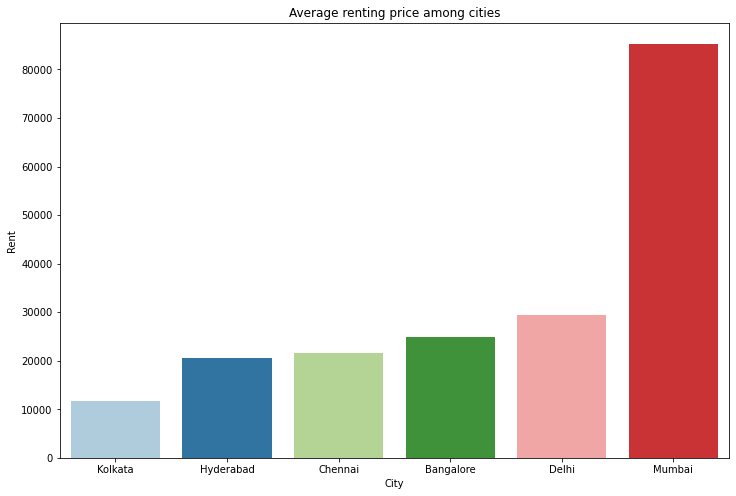

In [998]:
plt.figure(figsize=(12,8))
sns.barplot(data=data.groupby(['City'])['Rent'].mean().sort_values().to_frame().reset_index(),
            x='City', y='Rent', ci=None, palette='Paired')
plt.title("Average renting price among cities")
plt.show();

<font size="5">As the chart shows</font>

* <font size="5">Mumbai has the highest price for renting</font>

* <font size="5">Kolkata has the lowest average price for renting</font>

#### <font size="5">We can conclude that most of renting appear in the cities which have high population density</font>

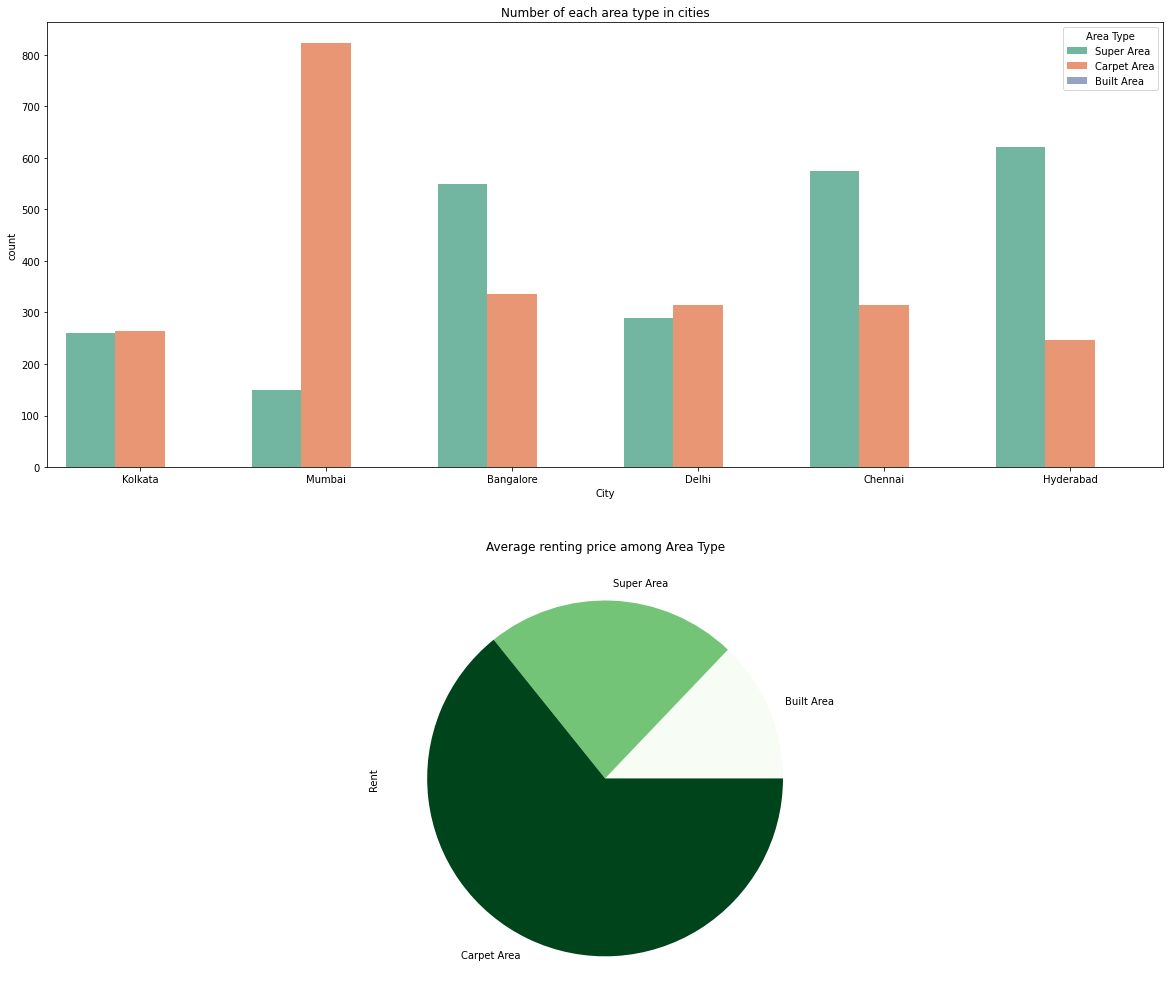

In [999]:
fig, axs = plt.subplots(2, 1, figsize=(20,18))

sns.countplot(ax=axs[0], data=data, x='City', hue='Area Type', palette='Set2')
axs[0].set_title("Number of each area type in cities")
data.groupby(['Area Type'])['Rent'].mean().sort_values().plot(kind='pie', cmap='Greens')
axs[1].set_title("Average renting price among Area Type")
plt.show();

<font size="5">It is clear that Carpet Area has significant high average renting price</font>

<font size="5">Where is the Built Area ?</font>

In [1000]:
display(data.groupby(['Area Type'])['Area Type'].count().to_frame())

,Area Type
Area Type,
Built Area,2
Carpet Area,2298
Super Area,2446


<font size="5">According to the chart and the tables</font>

* <font size="5">Build Area has only 2 samples while Carpet Area and Super Area have nearly the same sample size</font>

* <font size="5">In Mumbai, most of Area Type for renting is Carpet Area</font>

* <font size="5">While Kolkata and Delhi have similar number of Carpet Area and Super Area</font>

#### <font size="5">We also conclude that in city that have high population density, most of house for renting is Carpet Area type which have high prices</font>

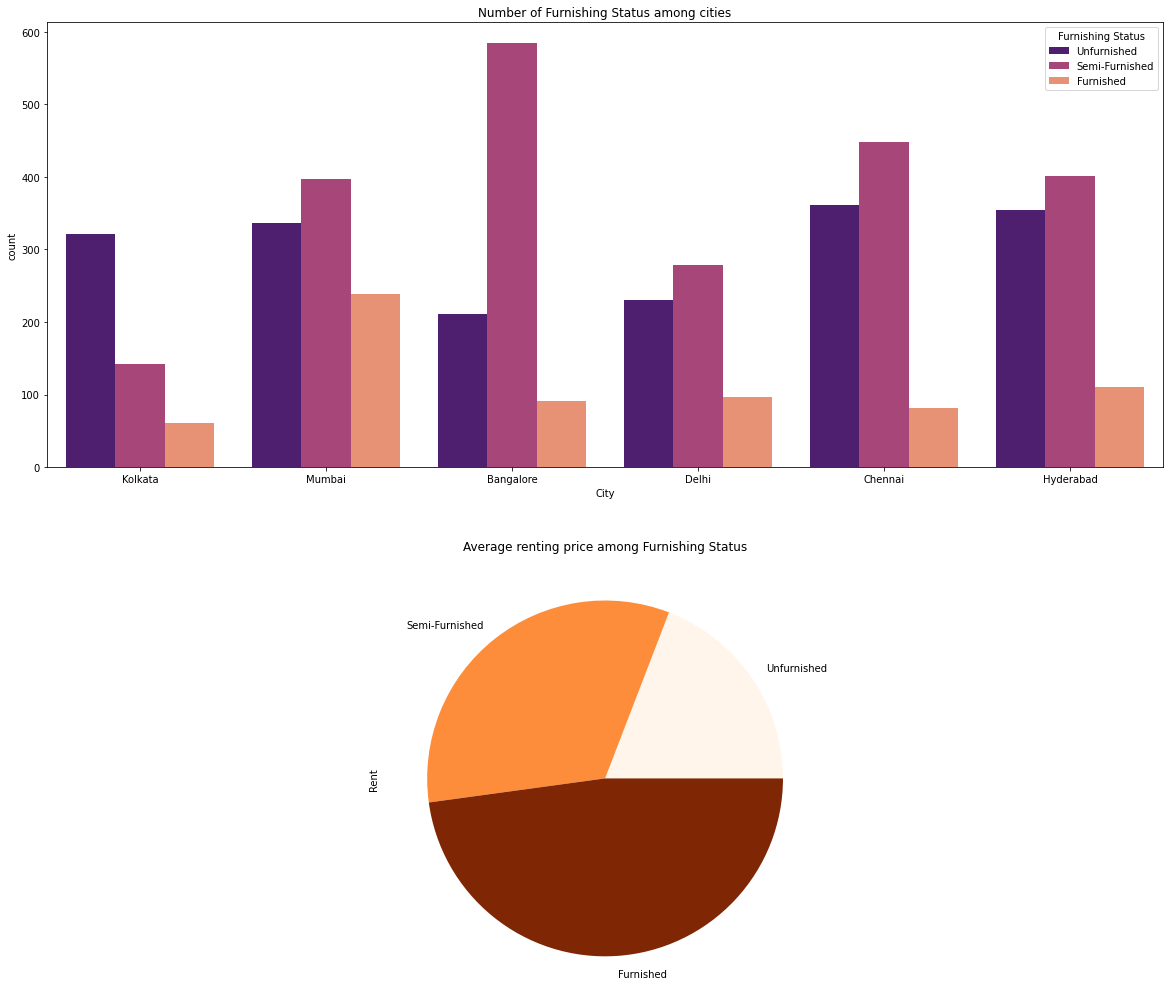

In [1001]:
fig, axs = plt.subplots(2, 1, figsize=(20,18))

sns.countplot(ax=axs[0], data=data, x='City', hue='Furnishing Status', palette='magma')
axs[0].set_title("Number of Furnishing Status among cities")

data.groupby(['Furnishing Status'])['Rent'].mean().sort_values().plot(kind='pie', cmap='Oranges')
plt.title("Average renting price among Furnishing Status")
plt.show();

* <font size="5">In Bangalore most of houses for renting are semi-Furnished</font>

* <font size="5">While the most number of houses unfirnished are in Chennai and Hyderabad</font>

* <font size="5">Houses which are furnished have the most highest average price for renting</font>

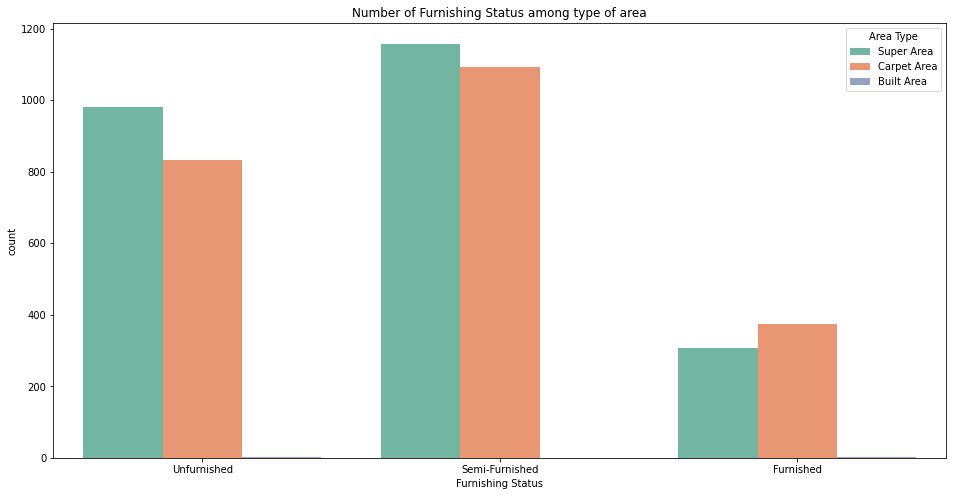

In [1002]:
plt.figure(figsize=(16,8))
sns.countplot(data=data, x='Furnishing Status', hue='Area Type', palette='Set2')
plt.title("Number of Furnishing Status among type of area")
plt.show();

<font size="5">Again we can not see the Build Area so I use the tables instead</font>

In [1003]:
display(data.groupby(['Area Type', 'Furnishing Status'])['Furnishing Status'].count().to_frame())

Furnishing Status
Area Type   Furnishing Status                   
Built Area  Furnished                          1
            Unfurnished                        1
Carpet Area Furnished                        373
            Semi-Furnished                  1093
            Unfurnished                      832
Super Area  Furnished                        306
            Semi-Furnished                  1158
            Unfurnished                      982

<font size="5">It is clear that:</font>

* <font size="5">Most of Carpet Area are Semi-Furnished and Unfurnished</font>

* <font size="5">But the highest number of Semi-Furnished and Unfurnished belong to the Super Area</font>

* <font size="5">There is one Build Area is Furnished and another is Unfurnished </font>

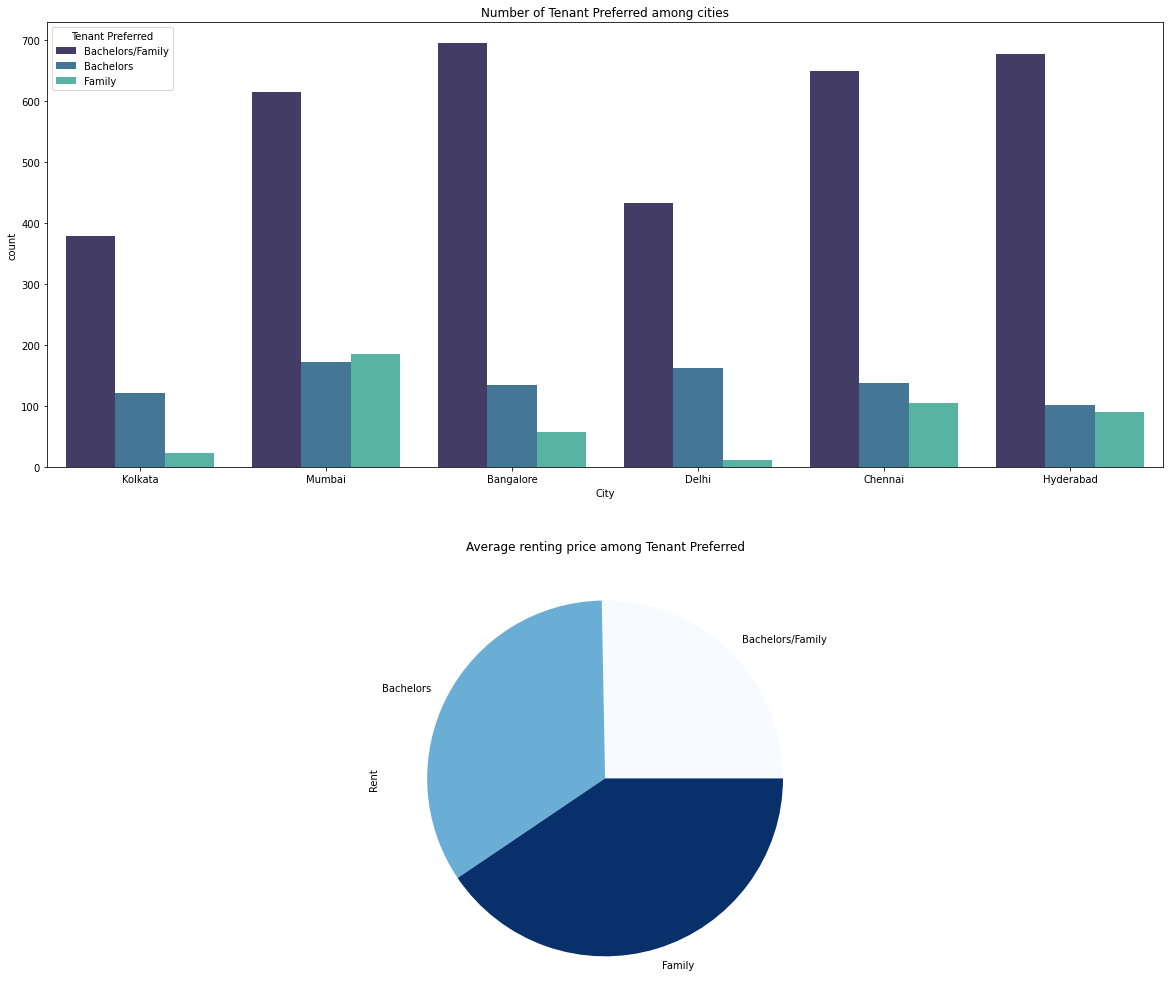

In [1004]:
fig, axs = plt.subplots(2, 1, figsize=(20,18))

sns.countplot(ax=axs[0], data=data, x='City', hue='Tenant Preferred', palette='mako')
axs[0].set_title("Number of Tenant Preferred among cities")

data.groupby(['Tenant Preferred'])['Rent'].mean().sort_values().plot(kind='pie', cmap='Blues')
plt.title("Average renting price among Tenant Preferred")
plt.show();

In [1005]:
data.groupby(['Tenant Preferred'])['Rent'].mean().sort_values().to_frame()

,Rent
Tenant Preferred,
Bachelors/Family,31210.79268
Bachelors,42143.79398
Family,50020.34110


<font size="5">Most of Tenants in cities are Bachelors/Family</font>

<font size="5">However, the price of renting for Family is higher than other type of Tenants</font>

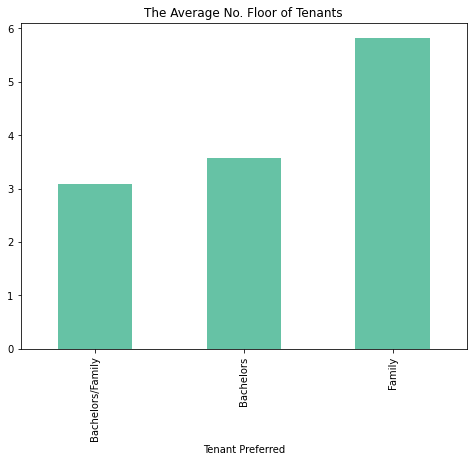

In [1006]:
plt.figure(figsize=(8,6))
data.groupby(['Tenant Preferred'])['current_floor'].mean().sort_values().plot(kind='bar', cmap='Set2')
plt.title("The Average No. Floor of Tenants")
plt.show();

<font size="5">Family have the highest average No. Floor while Bachelors/Family have the lowest one</font>

#### <font size="5">We can understand that why Family tenants have to pay more price for renting than other type of tenants</font>

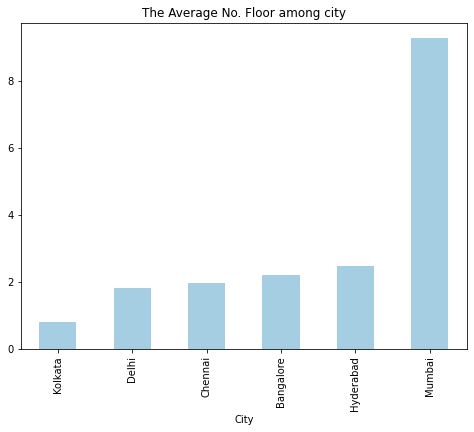

In [1007]:
plt.figure(figsize=(8,6))
data.groupby(['City'])['current_floor'].mean().sort_values().plot(kind='bar', cmap='Paired')
plt.title('The Average No. Floor among city')
plt.show();

<font size="5">Mumbai has the highest average No. Floor</font>


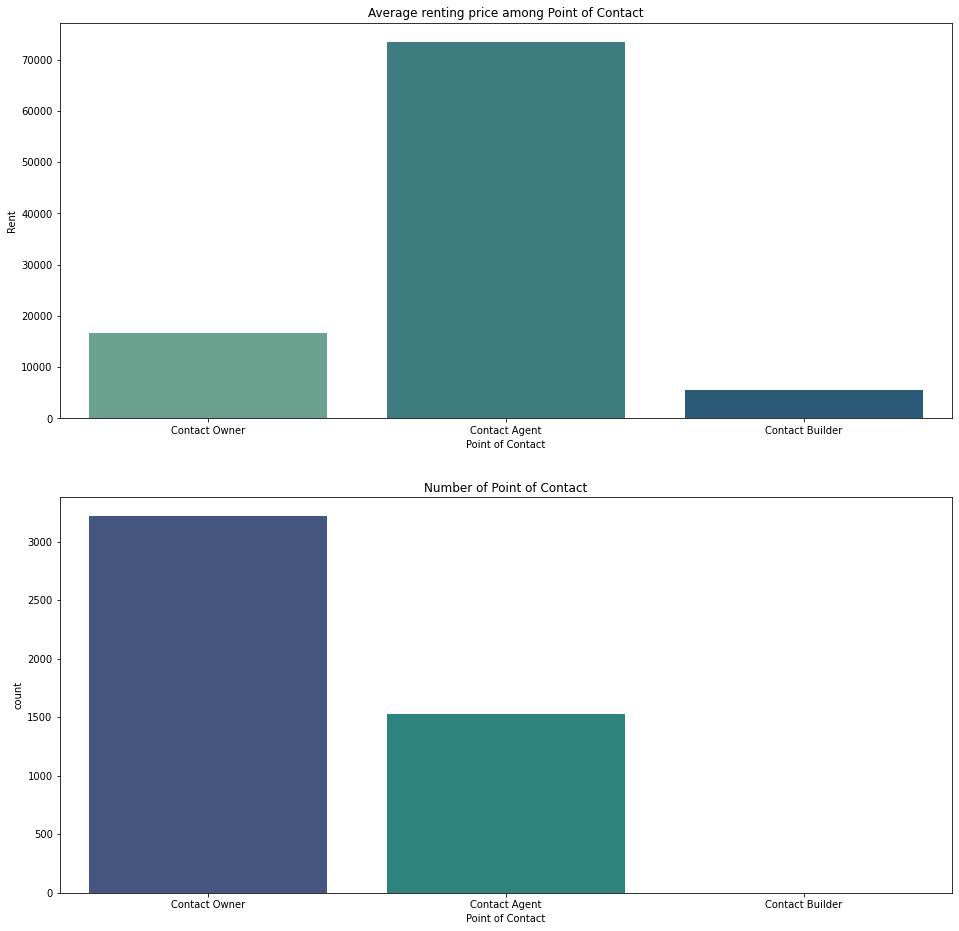

In [1008]:
fig, axs = plt.subplots(2, 1, figsize=(16,16))
sns.barplot(ax=axs[0], data=data, x='Point of Contact', y='Rent', palette='crest', ci=None)
axs[0].set_title("Average renting price among Point of Contact")
sns.countplot(ax=axs[1], data=data, x='Point of Contact', palette='viridis')
axs[1].set_title("Number of Point of Contact")
plt.show();

<font size="5">Most of house renting contact for tenant are via Owner of the house</font>

<font size="5">Contacting through Agent have the highest price of renting</font>

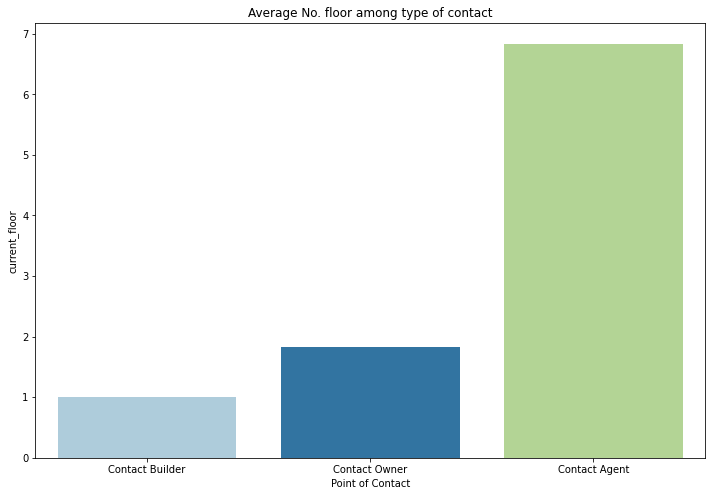

In [1009]:
plt.figure(figsize=(12,8))
sns.barplot(data=data.groupby(['Point of Contact'])['current_floor'].mean().sort_values().to_frame().reset_index(),
            x='Point of Contact', y='current_floor', ci=None, palette='Paired')
plt.title("Average No. floor among type of contact")
plt.show();

<font size="5">Most of high floor are rented through Agent</font>

#### <font size="5">We can understand that most of high price renting deal are contacted through Agent</font>

# Predicting Price

In [1010]:
df_fixed = data[['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
                'Bathroom', 'Point of Contact', 'current_floor']]

In [1011]:
y = data.Rent
X = df_fixed.drop(columns=['Rent'])

In [1012]:
y = np.log(y)
X = pd.get_dummies(X, drop_first=True)

In [1013]:
X.replace(0,-1, inplace=True)

<font size="5">Replace 0 with -1 for SVR model to perform properly</font>

### Splitting data

In [1014]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Modelling

In [1015]:
models= [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), 
         KNeighborsRegressor(n_neighbors=11), AdaBoostRegressor(), XGBRegressor(), SVR()]
scores= []
train_times = []
names= []

In [1016]:
for model in models:
    start= time.time()
    scores.append(cross_val_score(model, X_train, y_train, scoring= 'r2', cv= 10).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df= pd.DataFrame(scores, columns=['Score'], index= range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Model', pd.Series(names))
df

,Model,Score,Time
0,LinearRegression,0.79733,0.03895
1,DecisionTreeRegressor,0.61293,0.59107
2,RandomForestRegressor,0.78324,25.27118
3,KNeighborsRegressor,0.75487,0.16754
4,AdaBoostRegressor,0.59358,22.94752
5,XGBRegressor,0.78318,0.79986
6,SVR,0.78086,3.20203


> <font size="5">LinearRegression has the best performance</font>

### Choosing model for evaluation

In [1017]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

display(r2_score(y_test, y_pred))

0.8443495294096369